In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loding the dataset
data = pd.read_csv("/kaggle/input/old-car-price-prediction/car_price.csv")
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
# we will remove the first unnamed column
data = data.drop(data.columns[0], axis= 1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [5]:
data.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [6]:
# Columns 1,2,3,7,8 needs to be converted to numerical values
data['kms_driven'] = data['kms_driven'].apply(lambda x: x.rstrip(' kms'))
data['kms_driven'] = data['kms_driven'].apply(lambda x: x.replace(',', ''))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('st Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('nd Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('rd Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('th Owner'))
data['engine'] = data['engine'].apply(lambda x: x.rstrip(' cc'))
data['Seats'] = data['Seats'].apply(lambda x: x.rstrip(' Seats'))

In [7]:
data['ownership'].value_counts()

1    3736
2    1314
3     359
4      84
5      12
0       7
Name: ownership, dtype: int64

In [8]:
# now we can convert above columns into int
data = data.astype({'kms_driven':'int64', 'ownership':'int64', 'engine': 'int64', 'Seats': 'int64'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   int64 
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   int64 
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   int64 
 8   Seats                5512 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 387.7+ KB


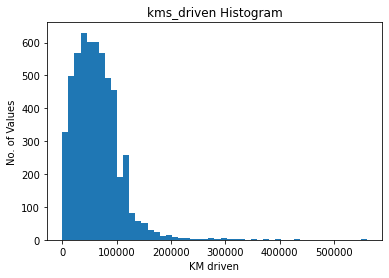

In [10]:
# now we have 5 numerical columns
# lets visualize them
plt.hist(data['kms_driven'], bins= 50)
plt.title('kms_driven Histogram')
plt.xlabel('KM driven')
plt.ylabel('No. of Values')
plt.show()

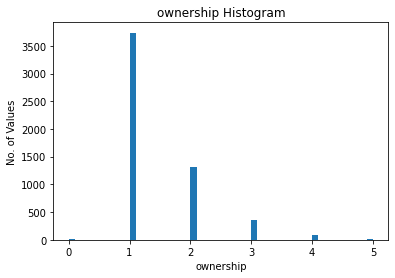

In [11]:
plt.hist(data['ownership'], bins= 50)
plt.title('ownership Histogram')
plt.xlabel('ownership')
plt.ylabel('No. of Values')
plt.show()

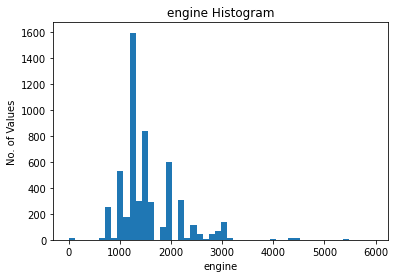

In [12]:
plt.hist(data['engine'], bins= 50)
plt.title('engine Histogram')
plt.xlabel('engine')
plt.ylabel('No. of Values')
plt.show()


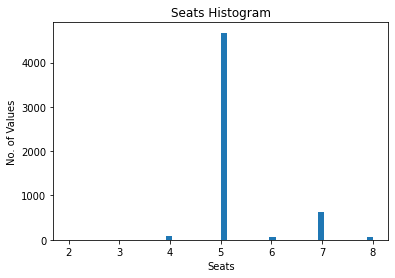

In [13]:
plt.hist(data['Seats'], bins= 50)
plt.title('Seats Histogram')
plt.xlabel('Seats')
plt.ylabel('No. of Values')
plt.show()

In [14]:
# Dealing with other columns 
data[['transmission']].value_counts()
# this column can be encoded as 1 and 0

transmission
Manual          3962
Automatic       1550
dtype: int64

In [15]:
data[['fuel_type']].value_counts()
# this column can also be encoded using labelencoder

fuel_type
Petrol       2967
Diesel       2423
Cng            80
Lpg            28
Electric       14
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_2 = LabelEncoder()

In [17]:
data['transmission'] = le.fit_transform(data['transmission'])

In [18]:
data['fuel_type'] = le_2.fit_transform(data['fuel_type'])

In [19]:
print(le.classes_)
print(le_2.classes_)

['Automatic' 'Manual']
['Cng' 'Diesel' 'Electric' 'Lpg' 'Petrol']


In [20]:
data.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,86226,1,1,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,13248,4,0,1,2021,1330,5
2,Toyota Camry 2.5 G,16.40 Lakh,60343,4,0,1,2016,2494,5
3,Honda Jazz VX CVT,7.77 Lakh,26696,4,0,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,69414,4,1,1,2016,1199,5


In [21]:
# scaling the kms_driven column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
data['kms_driven'] = sc.fit_transform(np.array(data['kms_driven']).reshape(-1,1))

In [23]:
data.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,0.550046,1,1,1,2017,1956,5
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,-1.194156,4,0,1,2021,1330,5
2,Toyota Camry 2.5 G,16.40 Lakh,-0.068568,4,0,1,2016,2494,5
3,Honda Jazz VX CVT,7.77 Lakh,-0.872744,4,0,1,2018,1199,5
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,0.148233,4,1,1,2016,1199,5
